In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define constants

In [26]:
r = 0.5
rs = 0.9

z_range = 10
n = 2_000
inc = z_range / n

### Create the population

In [27]:
%%time
# Parent Generation
px = np.linspace(-z_range/2, z_range/2, n)
py = np.exp(-px**2/2) / (2*np.pi)**0.5
parea = np.trapz(py, px)
psd = np.sqrt(sum(py*px**2) / sum(py))

CPU times: user 1.44 ms, sys: 984 µs, total: 2.43 ms
Wall time: 1.59 ms


In [28]:
%%time
# Individual Offspring distributions
oxs = rs*px + r*px.reshape(-1, 1)
oys = py * py.reshape(-1, 1)

CPU times: user 19.9 ms, sys: 17.4 ms, total: 37.3 ms
Wall time: 36.1 ms


In [29]:
ox = px  # remember these are defined to be the same
oys = py * py.reshape(-1, 1)

In [30]:
ox_bins = ox[:-1]
# ox_bins = ox[1:]

In [31]:
ox

array([-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,
        5.       ])

In [32]:
%%time
oxs_locs = np.digitize(oxs, ox_bins)

CPU times: user 94.7 ms, sys: 956 µs, total: 95.7 ms
Wall time: 94.7 ms


In [33]:
oxs_locs

array([[   0,    0,    0, ..., 1398, 1399, 1400],
       [   0,    0,    0, ..., 1399, 1399, 1400],
       [   0,    0,    0, ..., 1399, 1400, 1401],
       ...,
       [ 599,  600,  601, ..., 1999, 1999, 1999],
       [ 600,  601,  601, ..., 1999, 1999, 1999],
       [ 600,  601,  602, ..., 1999, 1999, 1999]])

In [34]:
oy = np.zeros(n)

In [35]:
%%time
for i in range(n):
    oy[i] = oys[np.where(oxs_locs == i)].sum()

CPU times: user 29.3 s, sys: 47.1 ms, total: 29.4 s
Wall time: 29.4 s


In [40]:
oarea = np.trapz(oy, ox)
oy = oy * parea / oarea  # parea is essential equal to one
osd = np.sqrt(sum(oy*ox**2) / sum(oy))

In [41]:
oy

array([1.04259529e-04, 2.80068850e-06, 2.82412124e-06, ...,
       3.04073510e-06, 2.74166459e-06, 1.07309379e-04])

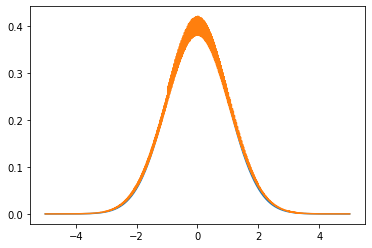

In [42]:
plt.plot(px, py)
plt.plot(ox, oy);

In [45]:
osd

1.0295672746814666

In [36]:
%%time
# Offspring Generation
oys_interp = np.array([np.interp(ox, oxs[i], oys[i], 
                    left=0, right=0) for i in range(n)])
oy = oys_interp.sum(axis=0)
oarea = np.trapz(oy, ox)
oy = oy * parea / oarea  # parea is essential equal to one
osd = np.sqrt(sum(oy*ox**2) / sum(oy))

CPU times: user 2.02 s, sys: 687 ms, total: 2.71 s
Wall time: 2.74 s


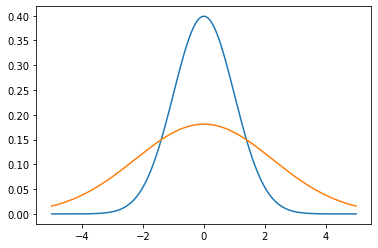

In [37]:
plt.plot(px, py)
plt.plot(ox, oy);

### Example of the edge

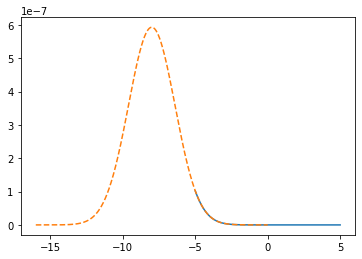

In [38]:
plt.plot(px, oys_interp[0])
plt.plot(oxs[0], oys[0], linestyle='--');

#### Possibilities
* Get expectation of the parent phenotype score as a function of offspring phenotype score.
* Get five distributions of the parent phenotypes for each of the five offspring quintiles. (Attributable.)
* Do the reverse as above - get five distributions of the offspring phenotypes for each of the five parent quintiles. (Destined.)
* Generate the standard deviation over all different pairs of `(r, rs)`. With 2.3 seconds per run, and 3,600 points (r from 0.1 to 1.6 and rs from 0.1 to 1.6, increments of 0.025) that would take 2.3 hours. We could do it in an hour with smaller `n`. 

## Parameter space

In [7]:
def get_sd(r, rs):
    # Individual Offspring distributions
    oxs = rs*px + r*px.reshape(-1, 1)
    
    # Offspring Generation
    oys_interp = np.array([np.interp(ox, oxs[i], oys[i], 
                        left=0, right=0) for i in range(n)])
    oy = oys_interp.sum(axis=0)
    oarea = np.trapz(oy, ox)
    oy = oy * parea / oarea  # parea is essential equal to one
    osd = np.sqrt(sum(oy*ox**2) / sum(oy))
    
    return osd

In [14]:
n_grid = 64

In [15]:
r_space = np.linspace(0.025, 1.6, n_grid)

In [16]:
rv, rsv = np.meshgrid(r_space, r_space)

In [17]:
sdv = np.zeros((n_grid, n_grid))

In [ ]:
for i in range(n_grid):
    for j in range(n_grid):
        print(i, j)
        sdv[i, j] = get_sd(rv[i, j], rsv[i, j])

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15


23 41
23 42
23 43
23 44
23 45
23 46
23 47
23 48
23 49
23 50
23 51
23 52
23 53
23 54
23 55
23 56
23 57
23 58
23 59
23 60
23 61
23 62
23 63
24 0
24 1
24 2
24 3
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
24 15
24 16
24 17
24 18
24 19
24 20
24 21
24 22
24 23
24 24
24 25
24 26
24 27
24 28
24 29
24 30
24 31
24 32
24 33
24 34
24 35
24 36
24 37
24 38
24 39
24 40
24 41
24 42
24 43
24 44
24 45
24 46
24 47
24 48
24 49
24 50
24 51
24 52
24 53
24 54
24 55
24 56
24 57
24 58
24 59
24 60
24 61
24 62
24 63
25 0
25 1
25 2
25 3
25 4
25 5
25 6
25 7
25 8
25 9
25 10
25 11
25 12
25 13
25 14
25 15
25 16
25 17
25 18
25 19
25 20
25 21
25 22
25 23
25 24
25 25
25 26
25 27
25 28
25 29
25 30
25 31
25 32
25 33
25 34
25 35
25 36
25 37
25 38
25 39
25 40
25 41
25 42
25 43
25 44
25 45
25 46
25 47
25 48
25 49
25 50
25 51
25 52
25 53
25 54
25 55
25 56
25 57
25 58
25 59
25 60
25 61
25 62
25 63
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
26 2

### Symmetry

In [ ]:
get_sd(r=0.1, rs=1)

In [ ]:
get_sd(r=1, rs=0.1)

In [89]:
get_sd(r=0.2, rs=0.4)

0.44721029690638037

In [90]:
get_sd(r=0.4, rs=0.2)

0.4472102782050869

In [29]:
get_sd(r=0.5, rs=0.6)

0.7810192000863271

In [30]:
get_sd(rs=0.5, r=0.6)

0.7810191952023158

In [102]:
r1, r2 = 0.5, 0.6

In [103]:
a1 = np.sort((r1*px + r2*px.reshape(-1, 1)).ravel())

In [104]:
a2 = np.sort((r2*px + r1*px.reshape(-1, 1)).ravel())

In [107]:
(a1 == a2).all()

True

In [113]:
(r1*px + r2*px.reshape(-1, 1)).T

array([[-5.5       , -5.49939994, -5.49879988, ...,  0.49879988,
         0.49939994,  0.5       ],
       [-5.49949995, -5.49889989, -5.49829983, ...,  0.49929993,
         0.49989999,  0.50050005],
       [-5.4989999 , -5.49839984, -5.49779978, ...,  0.49979998,
         0.50040004,  0.5010001 ],
       ...,
       [-0.5010001 , -0.50040004, -0.49979998, ...,  5.49779978,
         5.49839984,  5.4989999 ],
       [-0.50050005, -0.49989999, -0.49929993, ...,  5.49829983,
         5.49889989,  5.49949995],
       [-0.5       , -0.49939994, -0.49879988, ...,  5.49879988,
         5.49939994,  5.5       ]])

In [116]:
((r2*px + r1*px.reshape(-1, 1)) == (r1*px + r2*px.reshape(-1, 1)).T).all()

True

In [122]:
a = np.array([1, 2, 5])

In [123]:
a + a.reshape(-1, 1)

array([[ 2,  3,  6],
       [ 3,  4,  7],
       [ 6,  7, 10]])

In [46]:
px

array([-5.       , -4.9989999, -4.9979998, ...,  4.9979998,  4.9989999,
        5.       ])

In [81]:
0.8*px.reshape(-1, 1)[0] + 0.1*px

array([-4.5       , -4.49989999, -4.49979998, ..., -3.50020002,
       -3.50010001, -3.5       ])

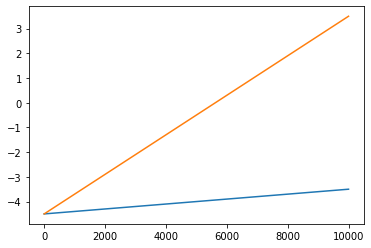

In [88]:
plt.plot(0.8*px.reshape(-1, 1)[0] + 0.1*px)
plt.plot(0.1*px.reshape(-1, 1)[0] + 0.8*px)

In [80]:
0.1*px.reshape(-1, 1)[0] + 0.8*px

array([-4.5       , -4.49919992, -4.49839984, ...,  3.49839984,
        3.49919992,  3.5       ])

In [83]:
0.1*px.reshape(-1, 1)[0] + 0.8*px

array([-4.5       , -4.49919992, -4.49839984, ...,  3.49839984,
        3.49919992,  3.5       ])

In [69]:
px

array([-5.       , -4.9989999, -4.9979998, ...,  4.9979998,  4.9989999,
        5.       ])

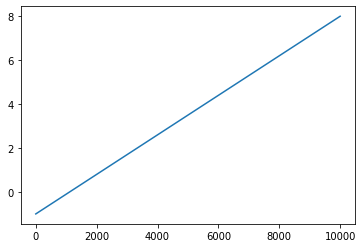

In [58]:
plt.plot((0.1*px.reshape(-1, 1)[0] + 0.8*px) - 0.8*px.reshape(-1, 1)[0] + 0.1*px)

In [45]:
0.1*px + 0.8*px.reshape(-1, 1)

array([[-4.5       , -4.49989999, -4.49979998, ..., -3.50020002,
        -3.50010001, -3.5       ],
       [-4.49919992, -4.49909991, -4.4989999 , ..., -3.49939994,
        -3.49929993, -3.49919992],
       [-4.49839984, -4.49829983, -4.49819982, ..., -3.49859986,
        -3.49849985, -3.49839984],
       ...,
       [ 3.49839984,  3.49849985,  3.49859986, ...,  4.49819982,
         4.49829983,  4.49839984],
       [ 3.49919992,  3.49929993,  3.49939994, ...,  4.4989999 ,
         4.49909991,  4.49919992],
       [ 3.5       ,  3.50010001,  3.50020002, ...,  4.49979998,
         4.49989999,  4.5       ]])

In [44]:
0.8*px + 0.1*px.reshape(-1, 1)

array([[-4.5       , -4.49919992, -4.49839984, ...,  3.49839984,
         3.49919992,  3.5       ],
       [-4.49989999, -4.49909991, -4.49829983, ...,  3.49849985,
         3.49929993,  3.50010001],
       [-4.49979998, -4.4989999 , -4.49819982, ...,  3.49859986,
         3.49939994,  3.50020002],
       ...,
       [-3.50020002, -3.49939994, -3.49859986, ...,  4.49819982,
         4.4989999 ,  4.49979998],
       [-3.50010001, -3.49929993, -3.49849985, ...,  4.49829983,
         4.49909991,  4.49989999],
       [-3.5       , -3.49919992, -3.49839984, ...,  4.49839984,
         4.49919992,  4.5       ]])

### Miscellaneous plots

(-4.0, 4.0)

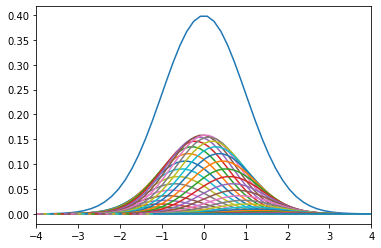

In [132]:
plt.plot(px, py)
for i in range(len(oxs)):
    plt.plot(oxs[i], oys[i])
plt.xlim(-4, 4)

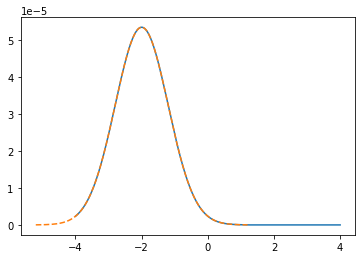

In [8]:
plt.plot(px, oys_interp[0])
plt.plot(oxs[0], oys[0], linestyle='--')

### Object oriented - perhaps later

In [143]:
class Population:
    def __init__(self, r, rs, z_range, n):
        # Parent generation x and y
        self.px = np.linspace(-z_range / 2, z_range/2, n)
        self.py = np.exp(-px**2/2) / (2*np.pi)**0.5

        # Individual Offspring dists. x and y
        self.oxs = rs*px + r*px.reshape(-1, 1)
        self.oys = py * py.reshape(-1, 1)

In [150]:
gen = Population(r, rs, z_range, n)